In [3]:
#1. 환경 준비
from tensorflow.keras.models import Sequential  
# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       
# 데이터를 다루는데 필요한 라이브러리를 불러옵니다.
import numpy as np

In [7]:
# 2. 데이터 준비
Data_set = np.loadtxt(
"https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/ThoraricSurgery3.csv"
, delimiter=",") 
# 준비된 수술 환자 데이터를 불러옵니다.
X = Data_set[:,0:16]                                                 
# 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]
# 수술 후 사망/생존 여부를 y로 지정합니다. 0 / 1

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [9]:
# 3. 구조 결정
model = Sequential()                                                  
# 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# 모델 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
# 딥러닝 모델을 실행합니다.
history=model.fit(X, y, epochs=5, batch_size=16)


Epoch 1/5


30/30 [==============================] - 1s 1ms/step - loss: 3.3300 - accuracy: 0.2681 
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8511


@ 딥러닝을 위한 기초 수학
<br />- ‘딥러닝을 배운다’는 말에는 딥러닝의 실행법을 익히는 것뿐 아니라, 딥러닝의 수학 원리를 공부한다는 의미도 담겨 있음
<br />- 원리를 알아야 정확히 실행할 수 있기 때문에 딥러닝의 원리를 이해하는 것은 좋은 코드를 만드는 것 이상으로 중요함
<br />- 딥러닝의 수학 원리를 이해하기 위해서는 당연히 기본적인 수학 지식이 필요함
<br />- 어떤 원리로 입력 값의 패턴을 분석하고 학습하는지 이해하려면 그 배경이 되는 수학 연산을 살펴보아야 하고, 여기에 사용되는 함수들을 알아야 하기 때문임
<br />- 좋은 소식은 딥러닝 뒤에 있는 수학적 배경이 다른 머신 러닝과 비교했을 때 그다지 어렵지 않다는 것
<br />- 딥러닝은 고등학교 수준의 수학만으로도 원리와 배경을 파악할 수 있음
<br />- 조금 더 깊이 공부하더라도 대학교 교양 강좌 수준을 넘지 않는 범위에서 딥러닝의 원리를 이해할 수 있음

@ 일차 함수, 기울기와 y 절편
<br />- 함수란 두 집합 사이의 관계를 설명하는 수학 개념
<br />- 변수 x와 y가 있을 때, x가 변하면 이에 따라 y는 어떤 규칙으로 변하는지 나타냄
<br />- 보통 함수를 나타낼 때는 function의 f와 변수 x를 사용해 y =f(x)라고 표시
<br />- 일차 함수는 y가 x에 관한 일차식으로 표현된 경우를 의미
<br />- 예를 들어 다음과 같은 함수식으로 나타낼 수 있음
  y = ax + b (a!=0)
<br />- x가 일차인 형태이며 x가 일차로 남으려면 a는 0이 아니어야 함
<br />- 일차 함수식 y = ax + b에서 a는 기울기, b는 절편이라고 함
<br />- 기울기는 기울어진 정도를 의미하는데, 그림 3-1에서 x 값이 증가할 때 y 값이 어느 정도 증가하는지에 따라 그래프의 기울기 a가 정해짐
절편은 그래프가 축과 만나는 지점을 의미
<br />- x가 주어지고 원하는 y 값이 있을 때 적절한 a와 b를 찾는 것, 이것이 바로 딥러닝을 설명하는 가장 간단한 표현

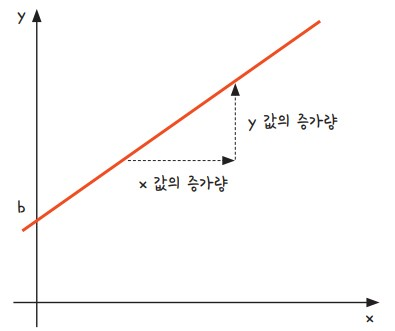

@ 이차 함수와 최솟값
<br />- 이차 함수란 y가 x에 관한 이차식으로 표현되는 경우를 의미
<br />- 다음과 같은 함수식으로 표현할 수 있음
<br />y = ax^2 (a != 0)
<br />- 이차 함수의 그래프는 포물선 모양
<br />- a > 0이면 아래로 볼록한 그래프가 됨
<br />- y = ax^2의 그래프를 x축 방향으로 p만큼, y축 방향으로 q만큼 평행 이동시키면 같이 움직임
<br />- 점 p와 q를 꼭짓점으로 하는 포물선이 됨 y = a(x-p)^2 + q
<br />- 이때 포물선의 맨 아래에 위치한 지점이 최솟값이 되는데, 딥러닝을 실행할 때는 이 최솟값을 찾아내는 과정이 매우 중요함
<br />- ‘최소 제곱법’ 공식으로 쉽게 알아낼 수 있음
<br />- 딥러닝을 실제로 실행할 때 만나는 문제에서는 대부분 최소 제곱법을 활용할 수가 없음
<br />- 그 이유는 최소 제곱법을 계산하기 위해 꼭 필요한 조건들을 알 수 없기 때문임
<br />- 미분과 기울기를 이용해야 함

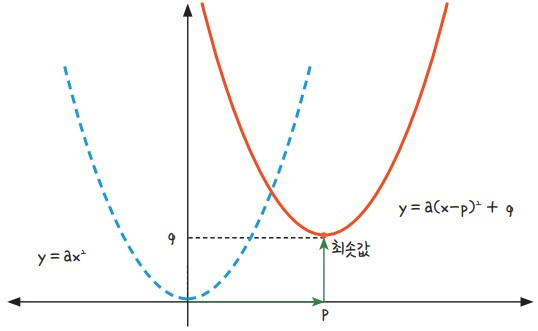

@ 미분, 순간 변화율과 기울기
<br />- 딥러닝을 이해하는 데 가장 중요한 수학 원리는 미분이라고 할 수 있음
<br />- 조금 전 딥러닝은 결국 일차 함수의 a와 b 값을 구하는 것인데, a와 b 값은 이차 함수 포물선의 최솟값을 구하는 것 
<br />- 이 최솟값을 미분으로 구하기 때문에 미분이 딥러닝에서 중요한 것
<br />
<br />* 미분과 기울기의 개념을 먼저 알아보자
<br />- y = x2이라는 그래프가 있다고 해 보자
<br />- x축에 있는 한 점 a에 대응하는 y의 값은 a^2
<br />- 이때 a가 오른쪽이나 왼쪽으로 조금씩 이동한다고 상상해 보자
<br />- 이에 따라 y도 조금씩 변화할 것
<br />- 상상력을 조금 더 발휘해 이번에는 a가 미세하게 ‘0에 가까울 만큼’ 움직였다고 하자
<br />- y 값 역시 매우 미세하게 변화를 할 텐데, 이번에는 너무 미세해서 실제로 움직이는 것이 아니라 방향만 드러내는 정도의 순간적인 변화만 있을 것
<br />- 이 순간의 변화를 놓고 순간 변화율이라는 이름을 붙였음
<br />- 순간 변화율은 어느 쪽을 향하는 방향성을 지니고 있으므로, 이 방향을 따라 직선을 길게 그려 주면 그래프와 맞닿는 접선이 그려짐
<br />- 이 선이 바로 이 점에서의 기울기가 됨

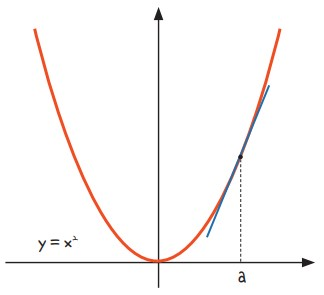

<br />- 미분을 한다는 것은 쉽게 말해 이 ‘순간 변화율’을 구한다는 것
<br />- 어느 순간에 어떤 변화가 일어나고 있는지 숫자로 나타낸 것을 미분 계수라고 하며, 이 미분 계수는 곧 그래프에서의 기울기를 의미
<br />- 이 기울기가 중요한 것은 기울기가 0일 때, 즉 x축과 평행한 직선으로 그어질 때가 바로 그래프에서 최솟값인 지점이 되기 때문임

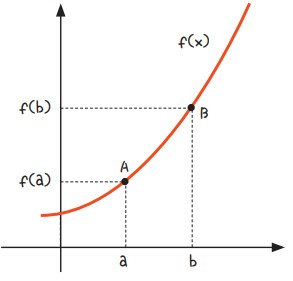

<br />- 이때 두 점 A와 B를 이어 직선을 만들면 그림 3-6과 같이 두 점 A와 B를 지나는 직선의 기울기가 그려짐
<br />- 여기서 Δ(델타)는 변화량을 나타내는 기호

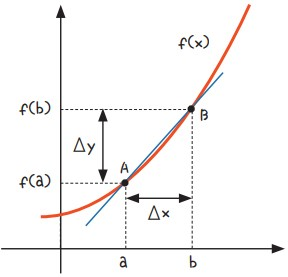

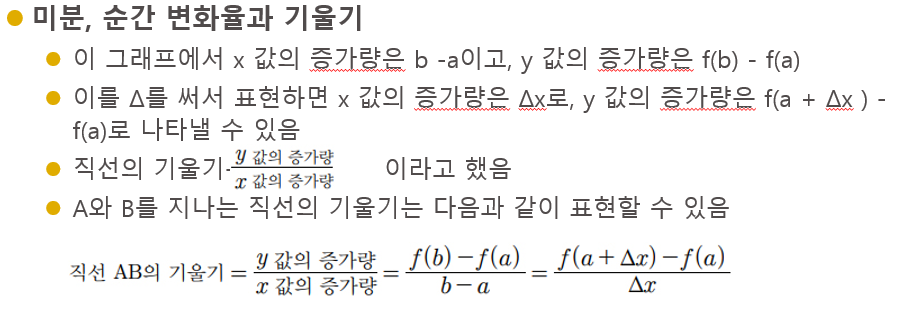

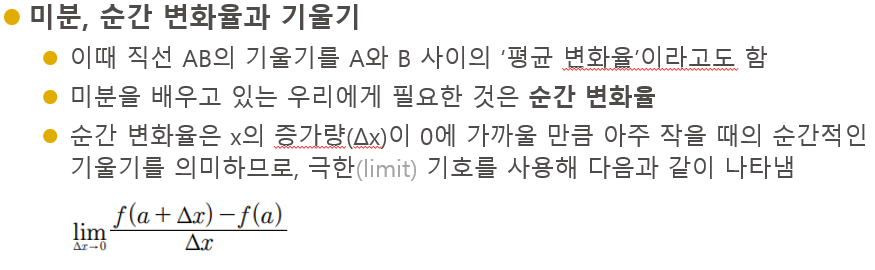

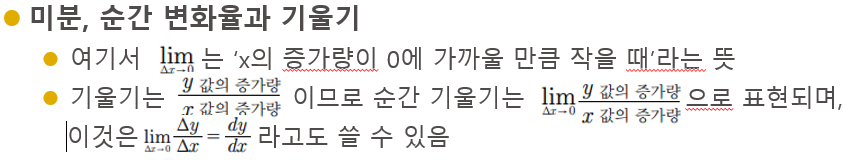

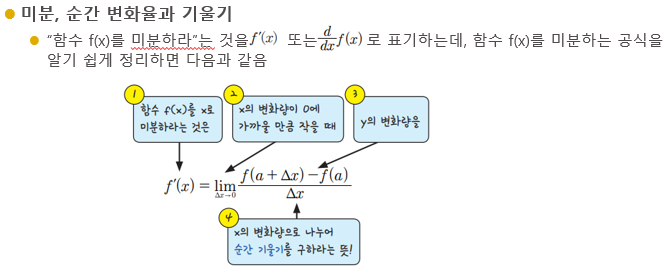

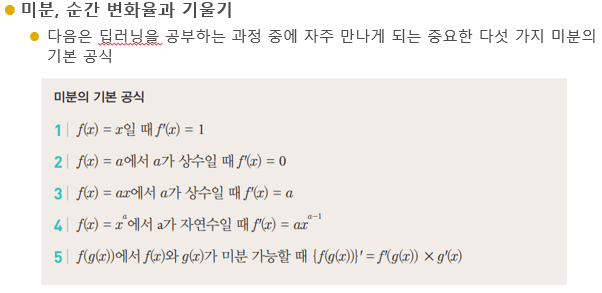

In [13]:
import numpy as np
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

In [16]:
# x값의 평균
mx = np.mean(x)
# y값의 평균
my = np.mean(y)
print(mx)
print(my)
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx) ** 2 for i in x ] )
# 기울기 공식의 분자 부분입니다.
def top(x, mx, y , my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y , my)
print(divisor, dividend)
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor
# y절편 b를 구하는 공식
b = my - (mx * a)
print(a, b)

5.0
90.5
20.0 46.0
2.3 79.0


In [19]:
#가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=3
fake_b=76
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b
#예측 값이 들어갈 빈리스트
predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print(x[i], y[i], predict(x[i]))

# 평균 제곱 오차 함수
n = len(x)
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred) ** 2)
print("평균 제곱 오차 : " , mse(y , predict_result))

2 81 82
4 93 88
6 91 94
8 97 100
평균 제곱 오차 :  11.0


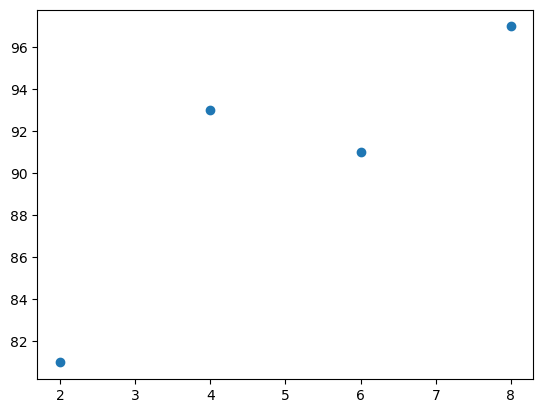

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0
# 학습률
lr = 0.03
#몇 번 반복될지를 설정합니다. 
epochs = 2001
# x 값이 총 몇 개인지 셉니다.
n=len(x)
# 경사하강법 시작
for i in range(epochs):
    #예측 값을 구하는 식입니다. 
    y_pred = a * x + b
    error = y - y_pred
    # 오차 함수를 a로 편미분한 값입니다. 
    a_diff = (2/n) * sum(-x *(error))
    # 오차 함수를 b로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))
    # 학률을 곱해서 1값을 구한다.
    a = a - lr * a_diff
    b = b - lr * b_diff
    if i % 100 == 0:
        print(i, a, b)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

# 모델실행
model = Sequential()
#            #출력갯수     # 입력갯수
model.add(Dense(1 , input_dim=1, activation = "linear")) # linear:선형회귀 : 활성화 함수
    # 오차 수정을 위해 경사 하강법(sgd) , 오차의 정도를 판단 = 평균 제곱 오차
model.compile(optimizer="sgd", loss="mse")
model.fit(x, y, epochs=2000)

In [30]:
hour = 7
prediction = model.predict([hour])
print(f"{hour} 시간 공부한 경우 예측 점수는 {prediction}입니다.")

1/1 [==============================] - 0s 85ms/step
7 시간 공부한 경우 예측 점수는 [[95.12]]입니다.


In [ ]:
#1. 환경설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
#2. 데이터 수집
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 
#3. 모델실행
model = Sequential()
#            #출력갯수     # 입력갯수
model.add(Dense(1 , input_dim=2, activation = "linear")) # linear:선형회귀 : 활성화 함수
    # 오차 수정을 위해 경사 하강법(sgd) , 오차의 정도를 판단 = 평균 제곱 오차
model.compile(optimizer="sgd", loss="mse")
model.fit(x, y, epochs=2000)

In [37]:
#4. 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])
print(hour, private_class, prediction)

1/1 [==============================] - 0s 35ms/step
7 4 [[97.52908]]


In [ ]:
#1. 환경설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

#2. 데이터 준비
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) 

#3. 모델실행
model = Sequential()
model.add(Dense(1, input_dim=1 , activation='sigmoid' ))
  # 오차수정 : 경사하강법(sgd) 
model.compile(optimizer='sgd', loss = "binary_crossentropy")
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 267ms/step - loss: 5.7010
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.3108
Epoch 3/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.9221
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.5354
Epoch 5/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.1512
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.7701
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3932
Epoch 8/5000
1/1 [==============================] - 0s 6ms/step - loss: 3.0220
Epoch 9/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.6587
Epoch 10/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.3066
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9705
Epoch 12/5000
1/1 [==============================] - 0s 16ms/step - loss: 1.6576
Epoch 13/5000
1/1 [===========================

In [1]:
#1. 환경설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# 가중치(기울기)와 바이어스(절편)
w11 = np.array([-2, -2]) 
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1
# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
# AND게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)
#OR 
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)
#NAND 
def NAND(x1, x2):
    return MLP(np.array([x1, x2]) , w11, b1)
# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2) , OR(x1, x2))
for x  in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(x[0], x[1])
    print( "(", x[0], x[1],") : ",  y)


( 0 0 ) :  0
( 1 0 ) :  1
( 0 1 ) :  1
( 1 1 ) :  0
